NAME: KARTIKEYA GUPTA

### IRIS FLOWERS CLASSIFICATION ML PROJECT

This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

In [4]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

##### Loading Iris Dataset

In [23]:
column_names=['sepal_length','sepal_width','petal_length','petal_width','Species']
data=pd.read_csv("C:\\Users\\ADMIN\\Downloads\\iris (1).data",names=column_names)
data

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [25]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Species         0
dtype: int64

In [27]:
data.groupby(['Species']).first()

,sepal_length,sepal_width,petal_length,petal_width
Species,,,,
Iris-setosa,5.1,3.5,1.4,0.2
Iris-versicolor,7.0,3.2,4.7,1.4
Iris-virginica,6.3,3.3,6.0,2.5


In [28]:
data.groupby(['Species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [29]:
data.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
Species          3
dtype: int64

In [32]:
data['Species'].unique()

'Iris-setosaIris-versicolorIris-virginica'

##### Plotting the data

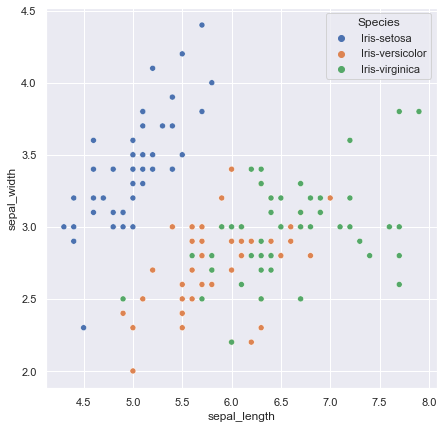

In [36]:
plt.subplots(figsize=(7,7))
sns.scatterplot(x='sepal_length',y='sepal_width',data=data,hue='Species');
plt.show()

1. Versicolor and Virginica has almost similar sepal width and sepal length.
2. Sepal_width of Setosa is the highest while its sepal_length is the smallest among other species.

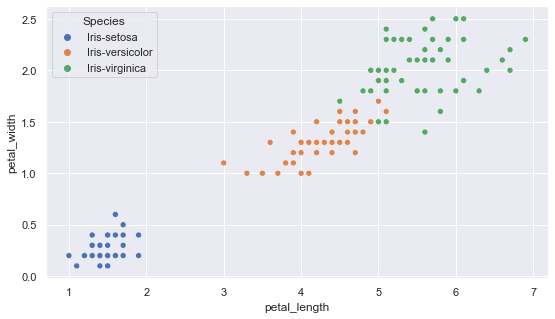

In [43]:
plt.subplots(figsize=(9,5))
sns.scatterplot(x='petal_length',y='petal_width',data=data,hue="Species");

1. petal size of Setosa is the smallest, and Virginica is the largest.
2. Petal size of Versicolor flowers is average.

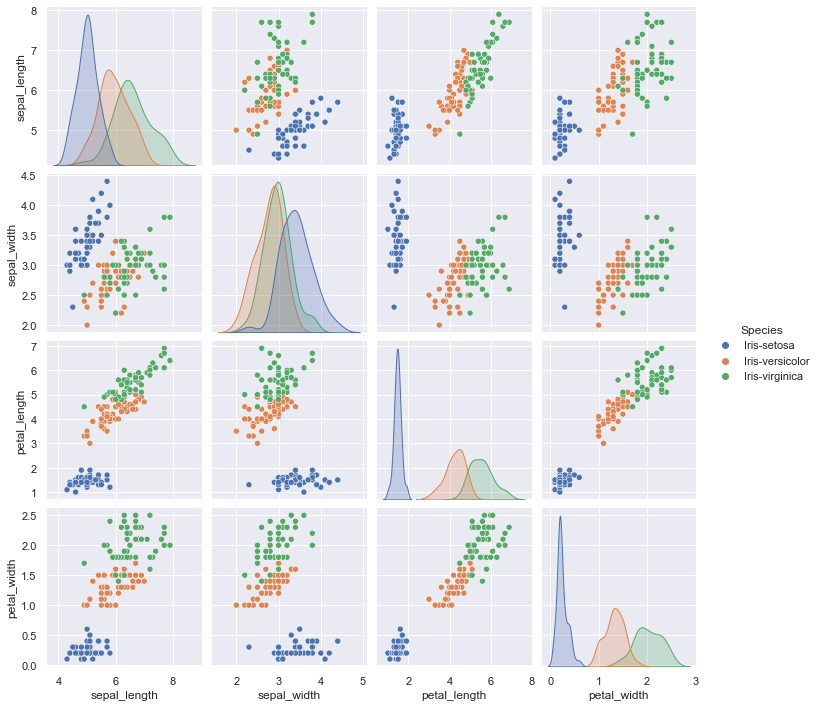

In [44]:
sns.pairplot(data=data,hue='Species')

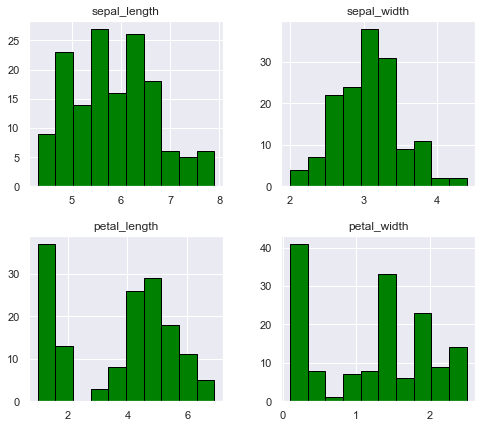

In [56]:
data.hist(figsize=(8,7),color='green',edgecolor='black');
plt.show()

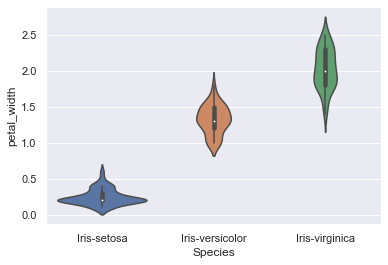

In [60]:
sns.violinplot(x='Species',y='petal_width',data=data,size=12);

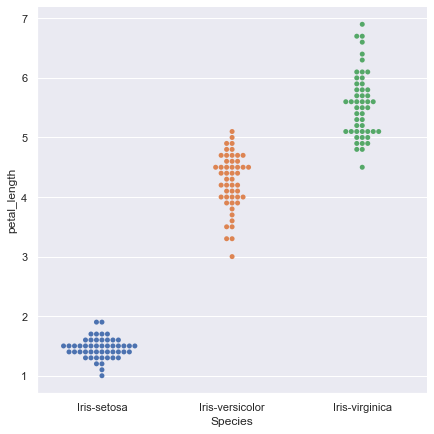

In [66]:
sns.catplot(x="Species", y="petal_length", kind='swarm',data=data,size=6);

#### Training and Testing 

In [70]:
from sklearn.model_selection import train_test_split

In [69]:
#iris = sns.load_dataset("iris")  OR
iris_set=datasets.load_iris()
iris_data=pd.DataFrame(iris_set.data,columns=iris_set.feature_names)
iris_data['Species']=iris_set.target
x=iris_data.iloc[:,:-1].values
y=iris_data.iloc[:,-1].values

In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=13)
x_train.shape

(112, 4)

In [75]:
x_test.shape

(38, 4)

In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

#### Logistic Regression

In [80]:
model=LogisticRegression(random_state=4)
model.fit(x_train,y_train)

LogisticRegression(random_state=4)

In [81]:
predict=model.predict(x_test)

In [82]:
prediction=pd.DataFrame(predict,y_test).reset_index()
prediction.columns=['Test','Prediction']
prediction.head(10)

,Test,Prediction
0,1,1
1,1,1
2,0,0
3,2,2
4,2,2
5,0,0
6,2,2
7,2,2
8,0,0
9,1,1


In [94]:
print("Confusion Matrix: \n",confusion_matrix(y_test,predict))
print("\nAccuracy Score: ",accuracy_score(y_test,predict))
print("\nf1_score: ",metrics.f1_score(y_test,predict,average='micro'))
print("\nclassification Report:\n", classification_report(y_test,predict))

Confusion Matrix: 
 [[12  0  0]
 [ 0 10  0]
 [ 0  1 15]]

Accuracy Score:  0.9736842105263158

f1_score:  0.9736842105263158

classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.94      0.97        16

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### k-means clustering

In [95]:
from sklearn.cluster import KMeans

In [97]:
kmeans_model=KMeans(3)
kmeans_model.fit(x)

KMeans(n_clusters=3)

In [98]:
kmean_prediction=kmeans_model.predict(x_test)

In [103]:
predictions=pd.DataFrame(kmean_prediction,y_test).reset_index()
predictions.columns=['Test','Prediction']
predictions.head(10)

,Test,Prediction
0,1,1
1,1,1
2,0,0
3,2,1
4,2,2
5,0,0
6,2,2
7,2,1
8,0,0
9,1,1


In [104]:
print("Confusion Matrix: \n",confusion_matrix(y_test,kmean_prediction))
print("\nAccuracy Score: ",accuracy_score(y_test,kmean_prediction))
print("\nf1_score: ",metrics.f1_score(y_test,kmean_prediction,average='micro'))
print("\nclassification Report:\n", classification_report(y_test,kmean_prediction))

Confusion Matrix: 
 [[12  0  0]
 [ 0 10  0]
 [ 0  7  9]]

Accuracy Score:  0.8157894736842105

f1_score:  0.8157894736842104

classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.59      1.00      0.74        10
           2       1.00      0.56      0.72        16

    accuracy                           0.82        38
   macro avg       0.86      0.85      0.82        38
weighted avg       0.89      0.82      0.81        38

